# Mini Project

In [63]:
# Import the necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [64]:
# read the data
df = pd.read_csv('fifa.csv')
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [65]:
df.shape

(18207, 60)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [67]:
# Removing unwanted features
df.drop(['ID', 'Photo', 'Flag', 'Club Logo'], axis=1, inplace=True)

In [68]:
df.shape

(18207, 56)

In [69]:
df.isnull().sum() / df.shape[0] * 100

Name                         0.000000
Age                          0.000000
Nationality                  0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing                    0.263635
HeadingAccuracy              0.263635
ShortPassing                 0.263635
Volleys                      0.263635
Dribbling   

In [70]:
# 'Loaned from' have more than 90% null values and removing that feature
df.drop('Loaned From', axis=1, inplace=True)

In [71]:
# For remaining null values impute mean of it
for col in df.columns:
    if (df[col].dtype == 'float64') or (df[col].dtype == 'int64'):
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df.isnull().sum().sum()

0

In [72]:
# Removing Currency symbol and converting it into float
for col in ['Value','Wage','Release Clause']:
    df[col] = pd.to_numeric(df[col].apply(lambda x: x[1:-1]))

In [73]:
# Converting date as year and int data type
df['Joined'] = df['Joined'].apply(lambda x: x.split()[-1])
df['Joined'] = df['Joined'].astype('int64')

In [74]:
# Converting into datetime format
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])

In [75]:
# Converting inches into decimals and to float data type
df['Height'] = df['Height'].apply(lambda x:float(x.replace("'", ".")))

In [76]:
# Removing LBS and converting into float data type
df['Weight'] = df['Weight'].apply(lambda x:float(x[:-3]))

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Overall                   18207 non-null  int64         
 4   Potential                 18207 non-null  int64         
 5   Club                      18207 non-null  object        
 6   Value                     17955 non-null  float64       
 7   Wage                      17966 non-null  float64       
 8   Preferred Foot            18207 non-null  object        
 9   International Reputation  18207 non-null  float64       
 10  Weak Foot                 18207 non-null  float64       
 11  Skill Moves               18207 non-null  float64       
 12  Work Rate         

In [78]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number',
       'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

# 1. Plot the distribution of Overall rating for all players. 

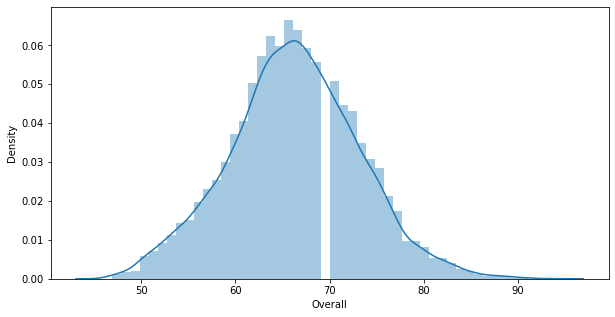

In [82]:
plt.figure(figsize=(10,5))
fig1 = sns.distplot(df['Overall'])
plt.show()

In [83]:
fig11 = fig1.get_figure()
fig11.savefig('dist.jpg')

# 2. Generate pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

<Figure size 720x360 with 0 Axes>

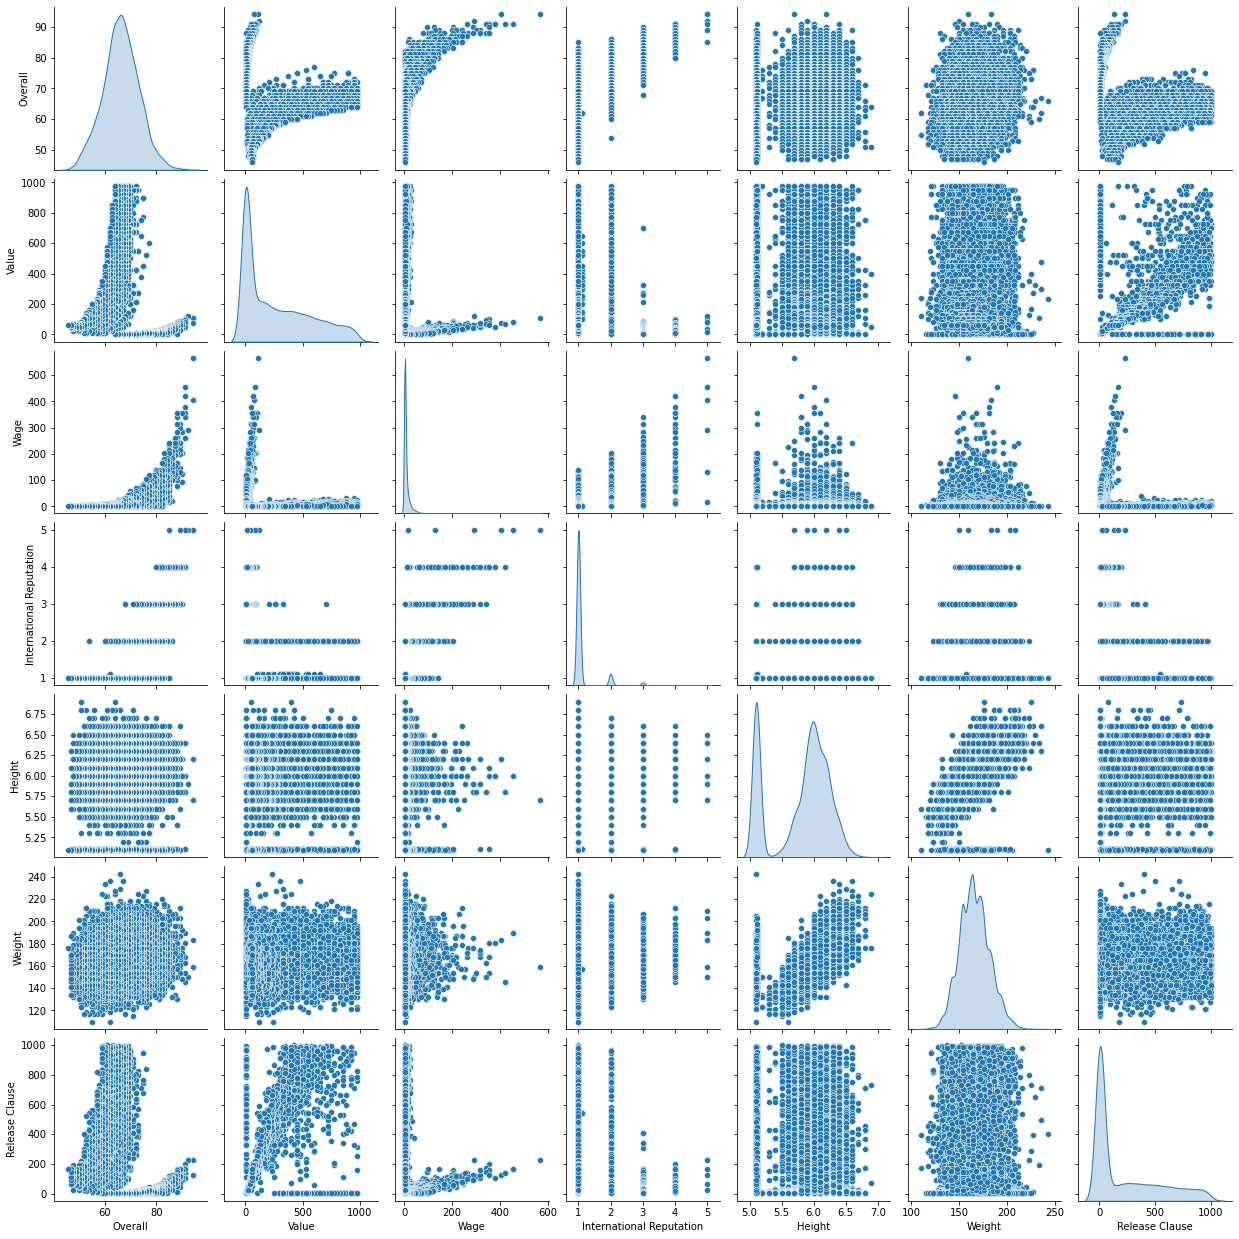

In [86]:
plt.figure(figsize=(10,5))
fig2 = sns.pairplot(df[['Overall','Value','Wage','International Reputation','Height','Weight','Release Clause']], diag_kind='kde')
plt.show()

In [87]:
fig2.savefig('pairplot.jpg')

# 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
a) What would the average wage for this set of players be?

In [91]:
top_20 = df[df['Contract Valid Until']== '2020'].sort_values(by='Overall', ascending=False).head(20)

In [94]:
top_20['Wage'].mean()

205.45

b) What is the average age?

In [97]:
top_20['Age'].mean()

30.65

c) Is there a correlation between the Overall rating and Value for these players?

In [101]:
cor = top_20[['Overall', 'Value']].corr()
cor

,Overall,Value
Overall,1.000000,0.786717
Value,0.786717,1.000000


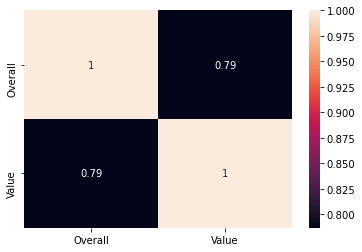

In [174]:
fig3 = sns.heatmap(cor, annot=True)
plt.show()

# Positive co-relation is seen betwen them

In [177]:
fig33 = fig3.get_figure()
fig33.savefig('corr.png')

# 4. Generate tables containing the top 5 players by Overall rating for each unique position.
a) Are there any players appearing in more than one Table. Please point out such players.


In [107]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

In [143]:
top_5=df.groupby(['Position']).apply(lambda x: x.nlargest(5,['Overall'])).reset_index(drop=True)
top_5.head(2)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,A. Griezmann,27,France,89,90,Atlético Madrid,78.0,145.0,Left,4.0,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165.8
1,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73.5,205.0,Right,3.0,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141.5


In [166]:
play_name.shape

(17194, 2)

In [167]:
play_name = pd.DataFrame(top_5['Name'].value_counts())
play_name.columns = ['num_of_times']
play_name['name'] = play_name.index
play_name = play_name.reset_index(drop=True)

play_name[play_name['num_of_times'] > 1]

,num_of_times,name


b) What is the average wage one can expect to pay for the top 5 in every position?

In [170]:
top_5['Wage'].groupby(by=top_5['Position']).mean()

Position
CAM    174.0
CB     139.6
CDM    217.0
CF      47.4
CM     130.6
GK     192.8
LAM     81.6
LB     177.2
LCB    162.0
LCM    184.4
LDM    126.6
LF     121.2
LM     164.6
LS     130.2
LW     261.0
LWB     34.2
RAM     45.4
RB     155.4
RCB    231.0
RCM    240.8
RDM    105.0
RF     148.0
RM     131.4
RS     132.2
RW     202.0
RWB     44.2
ST     294.0
Name: Wage, dtype: float64

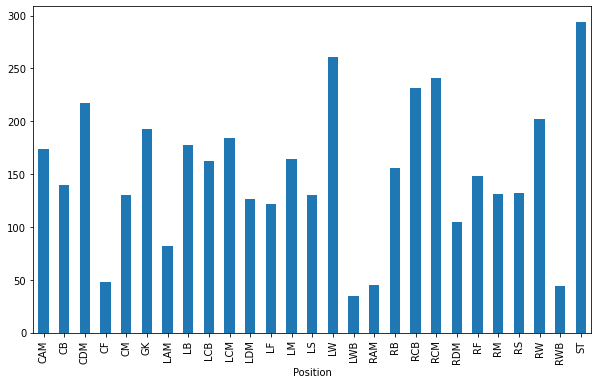

In [178]:
plt.figure(figsize=(10,6))
fig4 = top_5['Wage'].groupby(by=top_5['Position']).mean().plot(kind='bar')
plt.show()

In [180]:
fig44 =fig4.get_figure()
fig44.savefig('Average wage in top 5 per position.png')